<a href="https://colab.research.google.com/github/aramirezfr/Aircraft-Acquisition-Proposal/blob/master/CNN_Pneumonia_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pneumonia Image Binary Classifier Model** \
By: Adriana Ramirez Franco. \
Email: aramirezfr20@gmail.com

# Business Understanding

**About Pneumonia:** \
Pneumonia is a serious respiratory condition that can lead to severe complications, especially if not diagnosed early. Timely and accurate diagnosis is crucial to initiate appropriate treatment and reduce morbidity and mortality, particularly among vulnerable populations like children, the elderly, and individuals with compromised immune systems.


**Why not using traditional in person diagnosis by doctors?** \
Traditional diagnosis of pneumonia relies heavily on radiologists interpreting chest X-rays, which can be time-consuming and prone to human error, especially under high workloads or in resource-limited settings.

**How can we support a professional doctor's diagnosis?** \
To address these challenges, this project aims to develop a convolutional neural network (CNN)-based binary classification model to automatically identify pneumonia from chest X-ray images. By distinguishing between normal and pneumonia-affected lungs, the model will assist healthcare professionals in making quicker, more accurate decisions. This model can improve diagnostic efficiency, alleviate the burden on radiologists, enhance patient outcomes, and provide valuable support in remote or underserved areas where access to specialized radiology expertise is limited.

## Benefits of implementing a Medical Image Classifier

**Medical image classification using machine learning** is critically important for several reasons:  

### **1. Faster Diagnosis and Treatment**  
Convolutional neural networks (CNNs), can analyze medical images much faster than humans. This reduces the time required for diagnosis, enabling quicker initiation of treatment, which is particularly crucial for conditions like pneumonia, cancer, or strokes where delays can have life-threatening consequences.

### **2. Improved Accuracy and Consistency**  
Machine learning systems can match or exceed the diagnostic accuracy of radiologists in specific tasks, as they learn from large datasets and can identify patterns that may be difficult for human experts to detect. This ensures consistency in diagnosis, reducing human errors caused by fatigue or cognitive bias.

### **3. Addressing Resource Gaps**  
In many regions, especially remote or low-resource settings, there is a shortage of radiologists and specialized healthcare professionals. Machine learning models can act as decision-support tools to help non-specialists make informed diagnoses or prioritize cases that need expert attention.

### **4. Reduced Workload for Healthcare Professionals**  
With the increasing demand for medical imaging, radiologists often have to analyze hundreds of images per day. AI systems can help pre-screen images or highlight abnormal cases, allowing radiologists to focus their expertise on the most critical cases, improving workflow efficiency.

### **5. Continuous Learning and Scalability**  
Machine learning models can continuously improve as they are trained with new data, making them adaptable to emerging medical conditions. They are also scalable, meaning once a model is developed, it can be deployed across multiple healthcare systems globally with minimal modifications.

### **6. Enabling Preventive Healthcare**  
Automated image classification can also aid in early detection of diseases that may not exhibit symptoms initially, facilitating preventive interventions. For instance, AI models used for early screening of pneumonia or lung cancer can detect subtle abnormalities that might be missed in routine examinations.

In summary, machine learning-based medical image classification is transforming healthcare by enhancing diagnostic accuracy, improving efficiency, and expanding access to quality care, making it an essential tool for modern medicine.

# Data Understanding

1. **Source and Properties of the Data**:
   - This dataset, published by Paul Mooney on Kaggle, originates from the Guangzhou Women and Children’s Medical Center. It contains labeled chest X-ray images grouped into "Pneumonia" (with bacterial and viral categories) and "Normal."
   - The images are grayscale with consistent resolution, showing clear lung structures. The dataset is ideal for supervised machine learning tasks since each image is accurately labeled as pneumonia or healthy, making it a reliable choice for binary classification.



2. **Size of Data and Descriptive Statistics of Features**:
   - The dataset comprises 5,863 images, divided into training, validation, and test sets, enabling efficient model evaluation. The training set includes around 4,000 images, with a smaller validation and test set.
   - Key features include image pixel intensity values, which represent lung opacity patterns. The dataset contains approximately three times more pneumonia cases than normal ones, making it slightly imbalanced.

3. **Feature Suitability**:
   The primary feature—chest X-ray images—allows for visual detection of pneumonia markers, such as lung opacity and structure irregularities. This aligns well with the objective to classify cases of pneumonia versus healthy lungs based on these medical imaging patterns.



4. **Limitations of Using This Data**:
   - *Challenges*: The dataset's class imbalance (more pneumonia cases than normal) could affect model performance. The variation in image quality and possible label inconsistencies may also introduce noise, impacting model accuracy and generalizability.
   - *Generalization Limits*: Since the dataset was sourced from a specific medical center, models trained on it might not generalize well to X-rays from different machines or patient demographics.


For further details, refer to the Kaggle dataset page: [Chest X-Ray Images (Pneumonia) on Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).

# Data Preparation

I will begin downloading the necessary file from Kaggle, unzip the file, and I will be importing the necessary libraries for this project.

In [ ]:
#Downloading the data file from Kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:11<00:00, 260MB/s]
100% 2.29G/2.29G [00:11<00:00, 222MB/s]


In [ ]:
#Unzip the data folder
!unzip chest-xray-pneumonia.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0446-0001.j

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

import os

-----------------

In [ ]:
#setting the directory that contains the kaggle data file
directory=os.listdir('data/chest_xray')
print(directory) #listing contents of directory

['train', 'test', '__MACOSX', 'chest_xray', 'val']


There are 3 directories inside the chest_xray file: training, validation and testing directory.

In [ ]:
#setting variables to set the directories
train_dir='data/chest_xray/train'
val_dir='data/chest_xray/val'
test_dir='data/chest_xray/test'

Using **image_dataset_from_directory** function to create a dataset from images stored in the previous directories.
I will create 3 different datasets, one for each directory.

In [ ]:
#creating datasets for all directories
train=keras.utils.image_dataset_from_directory(
    directory=train_dir,
    shuffle=True,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(150, 150))

test = keras.utils.image_dataset_from_directory (
    directory = test_dir,
    shuffle=True,
    labels = "inferred",
    label_mode='binary',
    batch_size = 32,
    image_size = (150,150))
validation = keras.utils.image_dataset_from_directory (
    directory = val_dir,
    shuffle=True,
    labels ="inferred",
    label_mode='binary',
    batch_size = 32,
    image_size = (150 , 150))

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


Each file in 'chest_xray' includes a set of images with **"Normal"** x-rays and another set of x-rays with **"Pneumonia"**.

In [ ]:
#checking the name of the classes in the files
print(train.class_names)
print(test.class_names)
print(validation.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


------------------

**Training data:**

The model uses training data to learn patterns, relationships, and rules that map inputs to outputs. A well-trained model should generalize from the training data to make accurate predictions on new, unseen data. The quality and diversity of the training data significantly affect the model's ability to generalize.A model trained on imbalanced data may not generalize well to real-world scenarios where the distribution of classes might be different. This can lead to poor performance in practical applications.

In [ ]:
#defineing directories of training images
pneumonia_dir = 'data/chest_xray/train/PNEUMONIA'
normal_dir = 'data/chest_xray/train/NORMAL'

#list files in each directory
pneumonia_files = os.listdir(pneumonia_dir)
normal_files = os.listdir(normal_dir)

#checking the quantity of images in each directory
len(pneumonia_files)+len(normal_files)

5216

There are 5216 images to train on that belong to the subgroups **'PNEUMONIA'** and **'NORMAL'**.

-----------------------------------------------------------------------------------------------------------------------------

Taking a look to see the difference between X-rays that show lungs with pneumonia and normal healthy lungs.

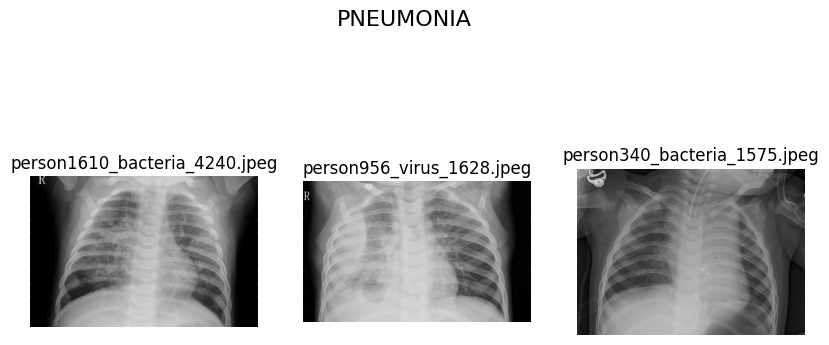

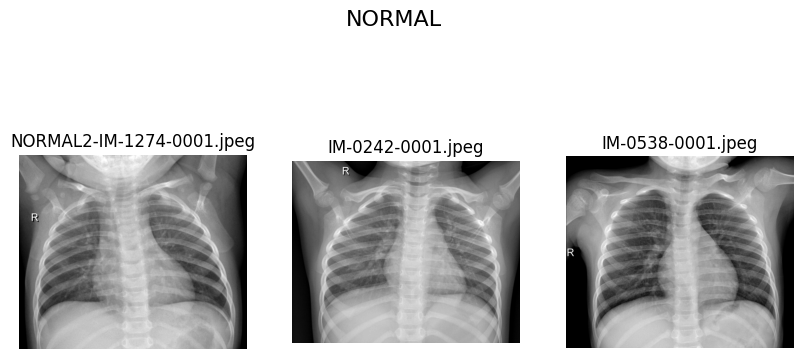

In [ ]:
#plot the count of images
def display_images(image_files, image_dir, num_images=5, title=''):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=16)

    for i, image_name in enumerate(image_files[:num_images]):
        image_path = os.path.join(image_dir, image_name)
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')  #using 'gray' for grayscale images
        plt.title(image_name)
        plt.axis('off')

#display images from PNEUMONIA class
display_images(pneumonia_files, pneumonia_dir, num_images=3, title='PNEUMONIA')

#display images from NORMAL class
display_images(normal_files, normal_dir, num_images=3, title='NORMAL')

**DIFFERENCE OF XRAYS WITH PNEUMONIA VS NORMAL**

In [ ]:
#checking the count of normal and x-rays with pneumonia
len(pneumonia_files), len(normal_files)

(3875, 1341)

* Out of the 100% (5,216) training images available, 74% (3,875) of them are Pneumonia images and 26% (1,341) of them are Normal Lung images. This demonstrates class imbalance. \
* In an ideally balanced dataset, each class would have an equal number of instances, typically approximately around 50% for each class for a binary classification problem. \

Plot the count of the images in the Training file to check for imbalance.

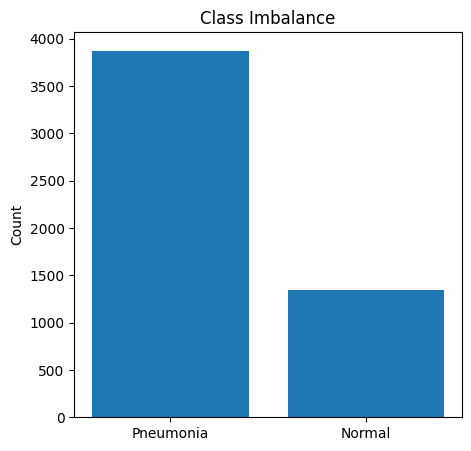

In [ ]:
#plotting the count of pneumonia and normal class
# create a variable with the counts:
pneumonia_count = len(pneumonia_files)
normal_count = len(normal_files)

#define the labels and their corresponding counts
labels = ['Pneumonia', 'Normal']
counts = [pneumonia_count, normal_count]

#plot
plt.figure(figsize=(5, 5))
plt.bar(labels, counts) #labels on the x-axis and counts on the y-axis
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.show()

## Data Augmentation:

Given that there is a severe class imbalance in the training class I will use ImageDataGenerator to create some synthetic images to help balance the class and help prevent overfitting.

In [ ]:
#setting parameters
img_size=(100,100)
SHAPE=(100,100,3)
batch_size=32

In [ ]:
#setting the data generator for train and validation
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=False,
                             fill_mode='nearest')

#setting the test data generator
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
#applying the data generator to training and validation sets
train_set=datagen.flow_from_directory(train_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      #shuffle=False,
                                      seed=42)

val_set=datagen.flow_from_directory(val_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      shuffle=False,
                                      seed=42)
test_set=test_datagen.flow_from_directory(test_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      shuffle=False,
                                      seed=42)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Now that the directories will be going through **ImageDataGenerator** their names (train_dir, val_dir, test_dir) will change to: train_set, val_set and test_set.

# Modeling:

**Model building** is an iterative process that starts from a baseline model to more complex models based on rationales that will be redefined on each iteration.\
I will start with a baseline model that will be used for comparison.
New model iterations will be justified on the models that will come after the base model.
New models will show a different result and we are looking for the best model that will give us the best result for this binary classifier.

## Baseline model:

In [ ]:
#setting metrics for all the models to be trained
METRICS=['accuracy',
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall')]

In [ ]:
#setting up the baseline model
base_model = models.Sequential([

    #first convolutional layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    #flatten the feature maps
    layers.Flatten(),

    #fully connected layer
    layers.Dense(128, activation='relu'),

    #output layer with a single neuron for binary classification
    layers.Dense(1, activation='sigmoid')])

In [ ]:
#compile the model
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

**Early Stopping:**

Is used to prevent overfitting and improve the training process. Early stopping can reduce the computational cost by stopping the training process once the model stops improving, saving time and computational resources.

In [ ]:
#defining callbacks for early stopping
early_stopping=[EarlyStopping(monitor='val_acc', patience=10),
                              ModelCheckpoint(filepath='best_model.keras',
                              monitor='val_acc',
                              mode='max',
                              save_best_only=True )]

In [ ]:
#defining callbacks for early stopping
early_stopping=[EarlyStopping(monitor='val_acc', patience=10, mode='max',
                              restore_best_weights=True  # Restore model weights from the epoch with the best metric value
                              )]

In [ ]:
base_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 76832)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       9,834,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,835,649 (37.52 MB)

 Trainable params: 9,835,649 (37.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#OG
#calculates # of batches needed to cover the training set in one epoch
#steps_per_epoch=len(train_set)//batch_size

#calculates # of batches needed to cover the validation set
#validation_steps=len(val_set)//batch_size

steps_per_epoch = train_set.samples // batch_size
validation_steps = val_set.samples // batch_size

In [ ]:
#train base model
base_model_hist = base_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 719ms/step - accuracy: 0.8377 - loss: 5.7619 - precision: 0.8917 - recall: 0.8939 - val_accuracy: 0.7500 - val_loss: 8.0603 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 3.8245 - val_precision: 0.7778 - val_recall: 0.8750
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 709ms/step - accuracy: 0.8321 - loss: 6.6425 - precision: 0.8910 - recall: 0.8791 - val_accuracy: 0.5000 - val_loss: 13.7889 - val_precision: 0.5000 - val_recall: 0.7500
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 8.0223 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 721ms/step - accuracy: 0.8614 - loss: 4.5805 - precision: 0.9067 - recall:

In [ ]:
#evaluate base model
results_base_train=base_model.evaluate(test_set)
results_base_train

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 358ms/step - accuracy: 0.7219 - loss: 8.4195 - precision: 0.4169 - recall: 0.6390


[5.533271789550781, 0.8141025900840759, 0.7914893627166748, 0.9538461565971375]

In [ ]:
#unpacking values
basetest_loss, basetest_accuracy, basetest_precision, basetest_recall = results_base_train

#print the result values
print(f"Test accuracy: {basetest_accuracy:.2f}")
print(f"Test precision: {basetest_precision:.2f}")
print(f"Test recall: {basetest_recall:.2f}")

Test accuracy: 0.81
Test precision: 0.79
Test recall: 0.95


**TO BE DELETED, ONLY EXPLAIN WHY DO WE SHOW VISUALS OF EACH MODEL AND LITTLE RECAP**

Here's why it's important and how focusing on precision and recall can benefit you:

**Visual Diagnosis:**
Detecting Overfitting/Underfitting: By plotting these metrics, you can visually assess whether your model is overfitting or underfitting. Overfitting is indicated by a large gap between training and validation metrics, where training performance is much better than validation performance. Underfitting might be suggested if both metrics are poor.\
**Training Stability:** You can see if the training process is stable or if the model's performance is volatile, which might suggest problems with the learning rate or data quality.

**Focusing on Precision and Recall:**
Precision: Important when the cost of false positives is high. A precision plot can help you understand how well the model is maintaining this aspect during training and validation.
Recall: Crucial when missing positive instances is costly. Plotting recall helps ensure the model is effectively identifying positive cases throughout training.

**Hyperparameter Tuning:** By visualizing these metrics, you can better understand how different hyperparameters (e.g., batch size, learning rate) affect model performance. This facilitates more informed decisions during hyperparameter tuning.

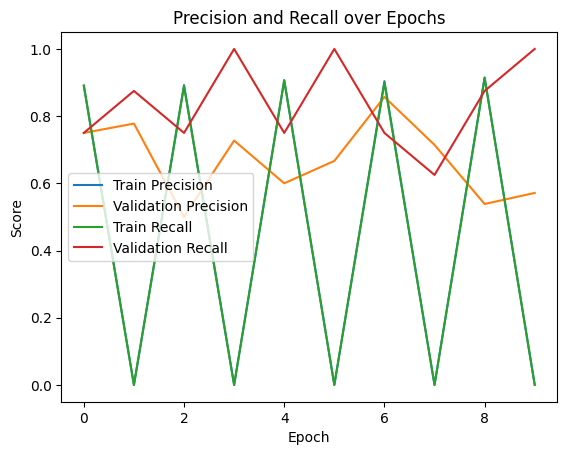

In [ ]:
#plot precision and recall
#(train)reflect how well the model is learning the patterns in the training data
plt.plot(base_model_hist.history['precision'], label='Train Precision')

#(validation)model's performance on unseen data
plt.plot(base_model_hist.history['val_precision'], label='Validation Precision')
plt.plot(base_model_hist.history['recall'], label='Train Recall')
plt.plot(base_model_hist.history['val_recall'], label='Validation Recall')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision and Recall over Epochs')
plt.legend()
plt.show()

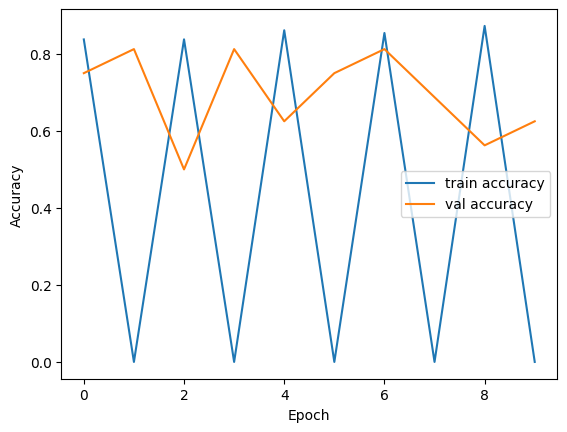

In [ ]:
#plot the training history
plt.plot(base_model_hist.history['accuracy'], label='train accuracy')
plt.plot(base_model_hist.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 1:

In [ ]:
#test 1 model
test1_model= models.Sequential([

    #first convolutional layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    #second convolutional layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    #flatten the feature maps
    layers.Flatten(),

    #fully connected layer
    layers.Dense(128, activation='relu'),

    #output layer with a single neuron for binary classification
    layers.Dense(1, activation='sigmoid')])

In [ ]:
#compile the model
test1_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
#train the test1_model
test1_history = test1_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 135s 807ms/step - accuracy: 0.6619 - loss: 33.9806 - precision: 0.7521 - recall: 0.8853 - val_accuracy: 0.5000 - val_loss: 1.2632 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.2357 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 133s 818ms/step - accuracy: 0.7980 - loss: 0.3752 - precision: 0.8050 - recall: 0.9694 - val_accuracy: 0.7500 - val_loss: 0.7302 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.6498 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 801ms/step - accuracy: 0.8955 - loss: 0.3231 - precision: 0.9280 - recall:

In [ ]:
#Evaluating the results of the model 1 with testing data
test1_results= test1_model.evaluate(test_set)
print("Evaluation results:", test1_results)

In [ ]:
#unpacking necessary metrics
test1_loss, test1_accuracy, test1_precision, test1_recall = test1_results

# Print the results
print(f"Test accuracy: {test1_accuracy:.2f}")
print(f"Test precision: {test1_precision:.2f}")
print(f"Test recall: {test1_recall:.2f}")

Test accuracy: 0.63
Test precision: 0.63
Test recall: 0.99


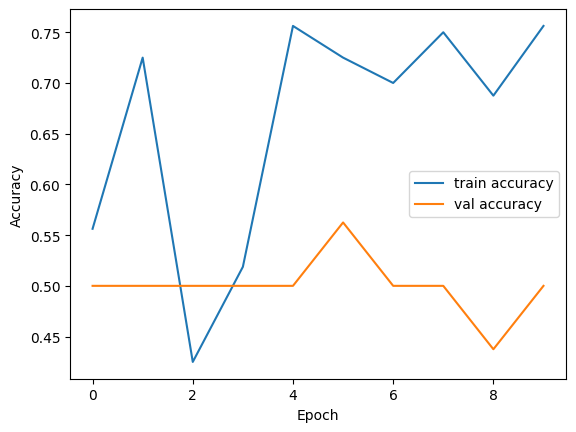

In [ ]:
#plot the training history
plt.plot(test1_history.history['accuracy'], label='train accuracy')
plt.plot(test1_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 2:

In [ ]:
#setting up model 2
test2_model = Sequential([
    #first convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    #second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #third conv layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #flat layer
    Flatten(),
    #fully connected layer
    Dense(128, activation='relu'),
    #adding dropout layer
    Dropout(0.5),  #to prevent overfitting
    Dense(1, activation='sigmoid')  #output layer for binary classification
])

In [ ]:
#compile for model 2
test2_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
#print summary model of architecture
test2_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,731,905 (6.61 MB)

 Trainable params: 1,731,905 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model 2
test2_history = test2_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6253 - loss: 16.8615 - precision: 0.6466 - recall: 0.9454 - val_accuracy: 0.5000 - val_loss: 7.0152 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 870ms/step - accuracy: 0.6178 - loss: 2.3297 - precision: 0.7467 - recall: 0.7136 - val_accuracy: 0.5000 - val_loss: 1.5298 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7413 - loss: 0.7284 - precision: 0.7492 - recall: 0.9801 - val_accuracy: 0.4375 - val_loss: 0.6899 - val_precision: 0.3333 - val_recall: 0.1250
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 906ms/step - accuracy: 0.5576 - loss: 0.6921 - precision: 0.7596 - recall: 0.5784 - val_accuracy: 0.5000 - val_loss: 1.4566 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 883ms/step - accuracy: 0.7179 - loss: 0.6445 - precision: 0.7239 - recall: 0.9881 - val_accuracy: 0.5625 - val_loss: 0.6482 - val_prec

In [ ]:
#evaluate and print the results of model 2
test2_results= test2_model.evaluate(test_set)
print("Evaluation results:", test2_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 341ms/step - accuracy: 0.4886 - loss: 0.7029 - precision: 0.3348 - recall: 0.6645
Evaluation results: [0.5129784941673279, 0.7051281929016113, 0.680701732635498, 0.9948717951774597]


In [ ]:
#unpack and print the metrics obtained from model 2
test2_loss, test2_accuracy, test2_precision, test2_recall = test2_results

print(f"Test accuracy: {test2_accuracy:.2f}")
print(f"Test precision: {test2_precision:.2f}")
print(f"Test recall: {test2_recall:.2f}")

Test accuracy: 0.71
Test precision: 0.68
Test recall: 0.99


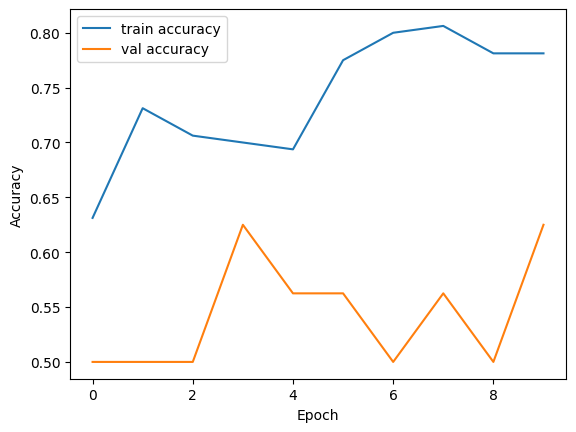

In [ ]:
#plot the training history
plt.plot(test2_history.history['accuracy'], label='train accuracy')
plt.plot(test2_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

After going through a thorough analysis, Model 2 is the one that has performed the best out of the 3 options that were modeled. Since I was using early stopping. I will proceed to run it organically in the following section "Evaluation".

## Model 3:

In [ ]:
#setting up model 3
test3_model = models.Sequential([
    #first convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    #second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #third conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #fourth conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), #flatten layer

    #fully connected Dense layer with 512 neurons
    #layers.Dense(512, activation='relu'),
    #layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), #10% of neurons will be dropped
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), #20% of neurons will be dropped
    #Increasing the dropout rate can provide stronger regularization

    #batch normalization maintains a stable distribution of activations throughout the network
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    #output layer: dense layer with 2 layers
    layers.Dense(1, activation='sigmoid')  #for binary classification
])


In [ ]:
#compile for model 3
test3_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
#print summary model 3 of architecture
test3_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,150,017 (4.39 MB)

 Trainable params: 1,146,945 (4.38 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:
#train the model 3
test3_history = test3_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5989 - loss: 0.7976 - precision: 0.6440 - recall: 0.9302 - val_accuracy: 0.5000 - val_loss: 6.1731 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 830ms/step - accuracy: 0.6438 - loss: 0.7715 - precision: 0.8397 - recall: 0.6311 - val_accuracy: 0.5000 - val_loss: 12.9357 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 965ms/step - accuracy: 0.7143 - loss: 0.6926 - precision: 0.9137 - recall: 0.6912 - val_accuracy: 0.5000 - val_loss: 4.4341 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7025 - loss: 0.6596 - precision: 0.8573 - recall: 0.7141 - val_accuracy: 0.5000 - val_loss: 2.0495 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 814ms/step - accuracy: 0.6562 - loss: 0.6633 - precision: 0.8915 - recall: 0.6334 - val_accuracy: 0.4

In [ ]:
#evaluate and print the results of model 3
test3_results= test3_model.evaluate(test_set)
print("Evaluation results:", test3_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - accuracy: 0.2973 - loss: 8.4219 - precision: 0.2979 - recall: 0.6645
Evaluation results: [4.429818630218506, 0.6217948794364929, 0.6237941980361938, 0.9948717951774597]


In [ ]:
#unpack and print the metrics obtained from model 3
test3_loss, test3_accuracy, test3_precision, test3_recall = test3_results

print(f"Test accuracy: {test3_accuracy:.2f}")
print(f"Test precision: {test3_precision:.2f}")
print(f"Test recall: {test3_recall:.2f}")

Test accuracy: 0.62
Test precision: 0.62
Test recall: 0.99


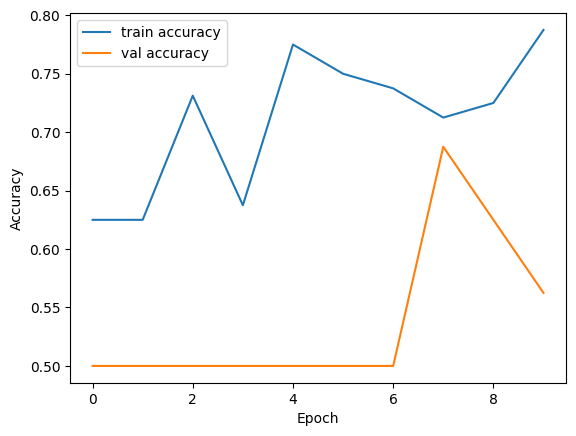

In [ ]:
#plot the training history
plt.plot(test3_history.history['accuracy'], label='train accuracy')
plt.plot(test3_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 4:

In [151]:
#setting up model 4
test4_model = models.Sequential([
    #first convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    #second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #third conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #fourth conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #fifth conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), #flatten layer

    #fully connected Dense layer with 512 neurons
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), #10% of neurons will be dropped
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), #20% of neurons will be dropped
    #Increasing the dropout rate can provide stronger regularization
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    #layers.Dropout(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), #20% of neurons will be dropped
    #Increasing the dropout rate can provide stronger regularization


    #batch normalization maintains a stable distribution of activations throughout the network
    layers.BatchNormalization(),

    #output layer: dense layer with 2 layers
    layers.Dense(1, activation='sigmoid')  #for binary classification
])


In [152]:
#compile for model 4
test4_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [153]:
#print summary for model 4 of architecture
test4_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 958,081 (3.65 MB)

 Trainable params: 955,009 (3.64 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [154]:
#train the model 4
test4_history = test4_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 157s 924ms/step - accuracy: 0.6989 - loss: 0.6387 - precision: 0.8410 - recall: 0.7280 - val_accuracy: 0.7500 - val_loss: 0.7408 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.8764 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 149s 914ms/step - accuracy: 0.8667 - loss: 0.3101 - precision: 0.9110 - recall: 0.9077 - val_accuracy: 0.5000 - val_loss: 2.8567 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 2.7101 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 151s 929ms/step - accuracy: 0.8663 - loss: 0.3046 - precision: 0.9006 - recall: 

In [155]:
#evaluate and print the results of model 4
test4_results= test4_model.evaluate(test_set)
print("Evaluation results:", test4_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 438ms/step - accuracy: 0.8740 - loss: 0.3410 - precision: 0.5534 - recall: 0.5206
Evaluation results: [0.43520498275756836, 0.8205128312110901, 0.9290123581886292, 0.771794855594635]


In [156]:
#unpack and print the metrics obtained from model 4
test4_loss, test4_accuracy, test4_precision, test4_recall = test4_results

print(f"Test accuracy: {test4_accuracy:.2f}")
print(f"Test precision: {test4_precision:.2f}")
print(f"Test recall: {test4_recall:.2f}")

Test accuracy: 0.82
Test precision: 0.93
Test recall: 0.77


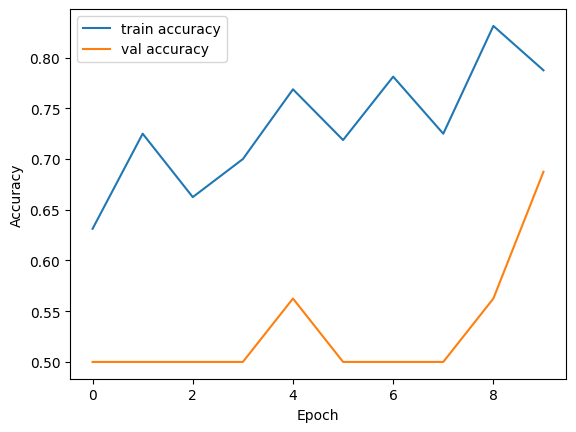

In [ ]:
#plot the training history
plt.plot(test4_history.history['accuracy'], label='train accuracy')
plt.plot(test4_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation:

----------------------

ALL THE LINES UNDER

In [ ]:
#checking accuracy:
results_train= model.evaluate(train, batch_size=128)
results_train

In [ ]:
results_test= model.evaluate(test, batch_size=128)
results_test

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))


Create a confusion Matrix to analyze the description of the performace of the classification model on the set of test data.

In [ ]:
cm= confusion_matrix(y_true=, y_pred=result)

In [ ]:
Create a classification report.

In [ ]:

y_pred=model.predict(test)
y_pred_classes = np.round(y_pred).astype(int)
#generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

#plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Create a classification report.
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)

# Summary:

## Results:

Training process(epochs?)\
how long does each epoch takes?\
total training time?\
results? \

true positives!!\
true negatives!!\
false positives??\
false negatives X (minimize) \